# Анализ данных телекоммуникационной компании с построением алгоритма по прогнозированию оттока пользователей 

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
# загрузка библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузка данных
data = pd.read_csv('telecom_users.csv')
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
# удалим ненужный столбец:
data = data.drop(columns='Unnamed: 0')

In [4]:
# выгрузим информацию по датасету:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [5]:
# выгрузим описательную статистику для tenure:
data['tenure'].describe()

count    5986.000000
mean       32.468760
std        24.516391
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

Минимально значение равно нулю. Посмотрим на этих клиентов:

In [6]:
data[data['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


Таких 10 человек. Эти клиенты на данный момент еще не внесли оплату.  
Примем условие, что в дальнейшем будут учитываться клиенты пользующиеся услугами компании от 1 месяца.

In [7]:
data = data[data['tenure'] != 0]

In [8]:
# изменим тип данных для TotalCharges:
data['TotalCharges'] = data['TotalCharges'].astype('float')

In [9]:
# выгрузим описательную статистику для оплаты по договору и общей суммы:
data[['MonthlyCharges', 'TotalCharges']].describe()

,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000
mean,64.846687,2298.060617
std,30.107576,2274.127165
min,18.250000,18.800000
25%,35.750000,404.312500
50%,70.425000,1412.150000
75%,89.900000,3846.962500
max,118.750000,8684.800000


In [10]:
# выгрузим описательную статистику для обьектных данных:
data.describe(include=[object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976
unique,5976,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3044,3080,4195,5388,2843,2627,2982,2604,2639,2959,2388,2353,3269,3525,2006,4389


Как видно по таблице, преобладают клиенты:  
 1. мужчины;
 2. не замежем/ не женаты;
 3. без детей;
 4. не подключивших услуги: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies;
 5. заключившие договор Month-to-month;
 6. с методом оплаты Electronic check

In [11]:
# определим количество активных и ушебших клиентов:
churn = data['Churn'].value_counts().reset_index()
churn

,index,Churn
0,No,4389
1,Yes,1587


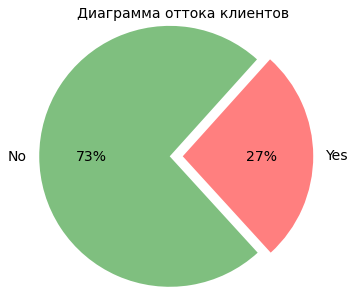

In [12]:
# визуализируем полученый результат в процентном отношении:
plt.pie(churn['Churn'],
        labels=churn['index'],
        autopct='%1.0f%%',
        labeldistance=1.1,
        startangle=48,
        radius=1.5,
        explode=[0.15, 0],
        colors=['green', 'red'],
        wedgeprops={'alpha':0.5},
        textprops={'fontsize': 14})

plt.title('Диаграмма оттока клиентов', pad=30, fontsize=14)
plt.show()

# 2. Исследование зависимостей и формулирование гипотез

Приступаем к поиску зависимостей с помощью графического метода.

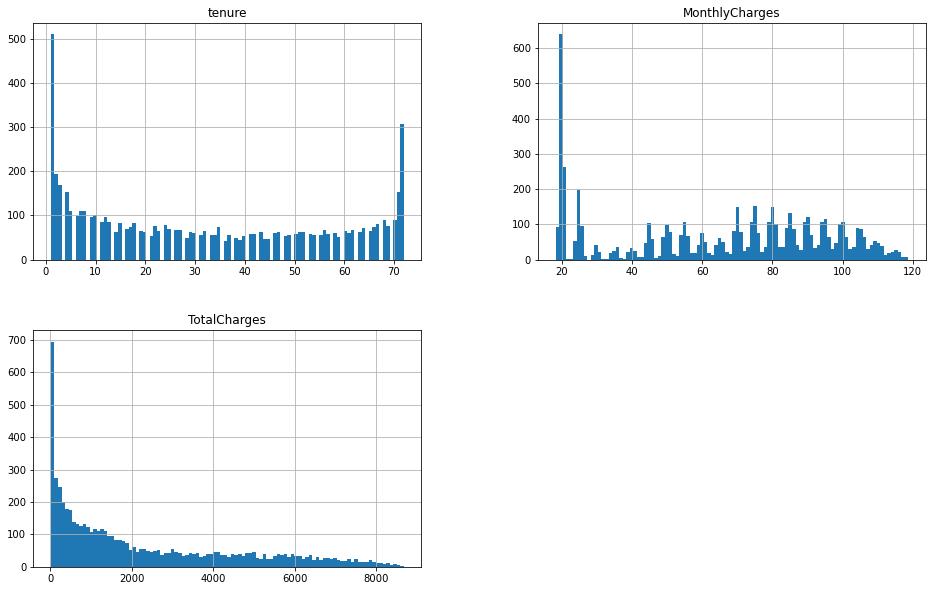

In [13]:
# исследуем числовые данные на наличие выбросов
num_data = data[['tenure', 'MonthlyCharges', 'TotalCharges']]

num_data.hist(figsize=(16,10), bins=100)

plt.show()

Выбросов нет

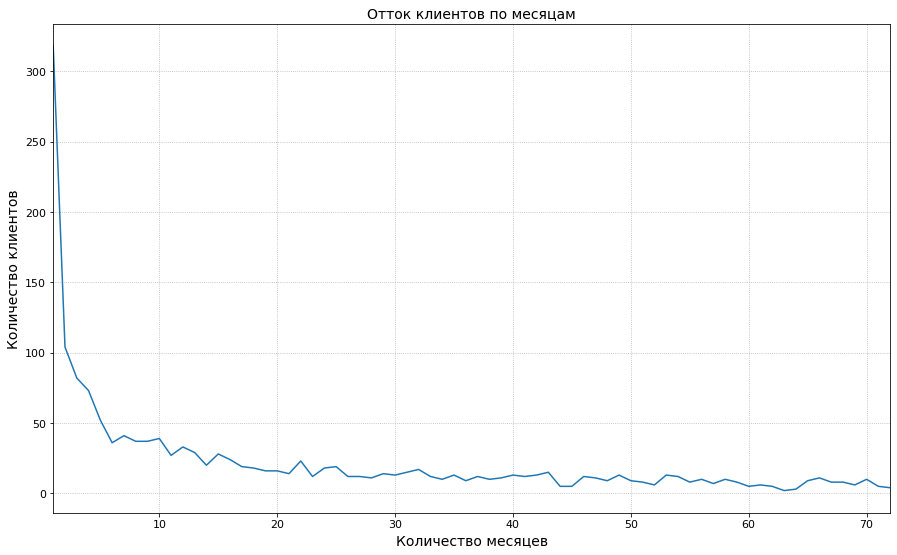

In [14]:
# посмотрим на отток клиентов по времени пользования услугами компании
tenure_df = data[data['Churn'] == 'Yes'].groupby('tenure')['Churn'].count().reset_index().copy()

plt.figure(figsize=(15, 9))

# рисуем график
plt.plot(tenure_df['tenure'], tenure_df['Churn'])

# редактируем метки осей, подписываем оси, добавляем сетку и заголовок
plt.xlim(tenure_df['tenure'].min(), tenure_df['tenure'].max())
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Количество месяцев', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.grid(linestyle='dotted')
plt.title('Отток клиентов по месяцам', fontsize=14)

plt.show()

Как видно на графике массовый отток клиентов происходит в первые месяцы. Возможно это связано с тем, что клиенты заключают договор Month-to-month для ознакомления, пользуются услугами какое-то время и в итоге понимают, что их такой вариант не устраивает и решают не продлевать контракт.  
Если брать весь период наблюдения, то прослеживается нисходящий тренд.

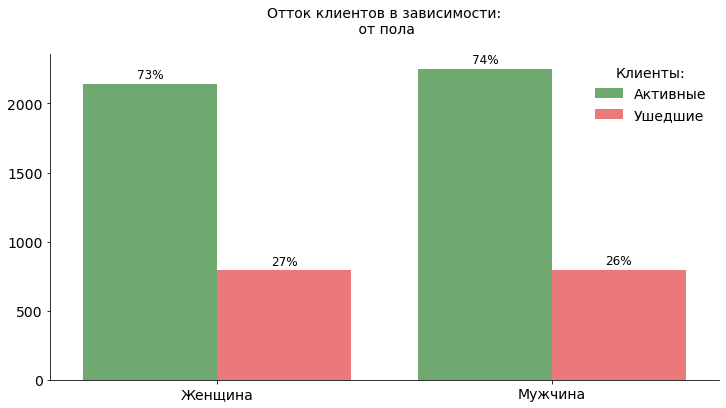

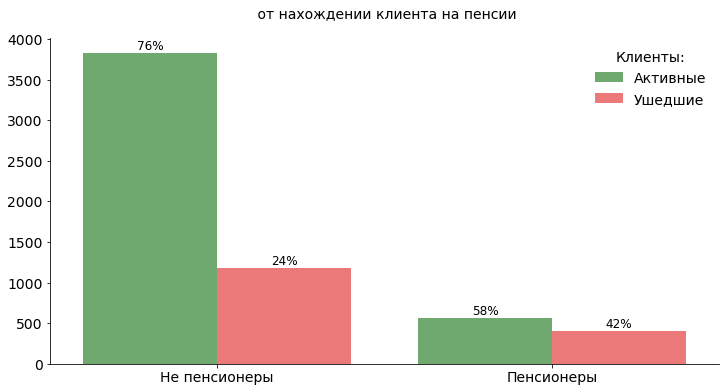

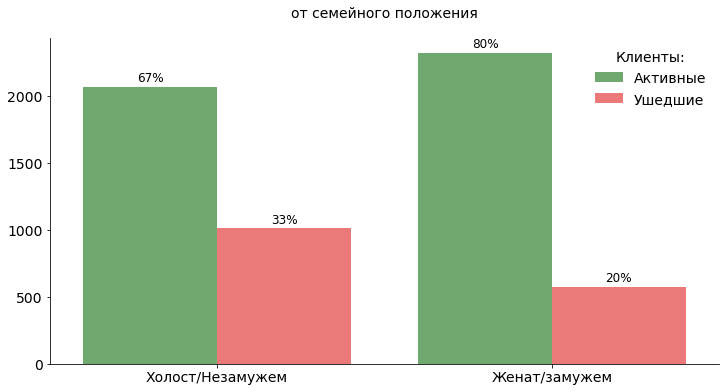

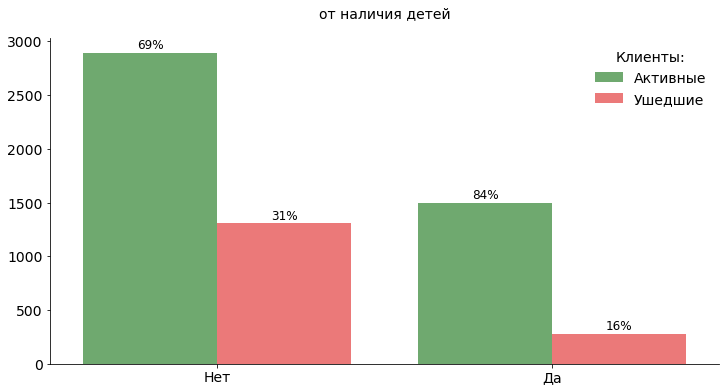

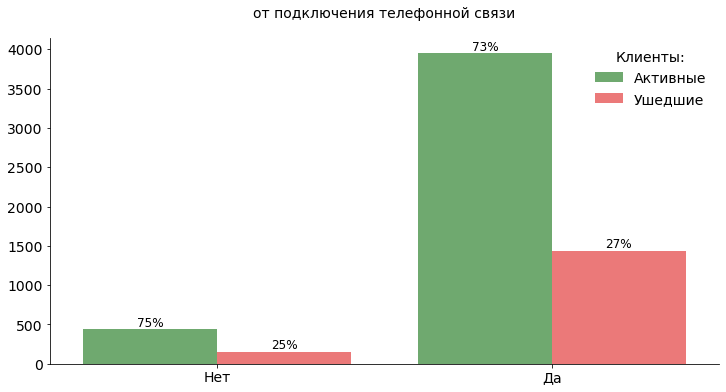

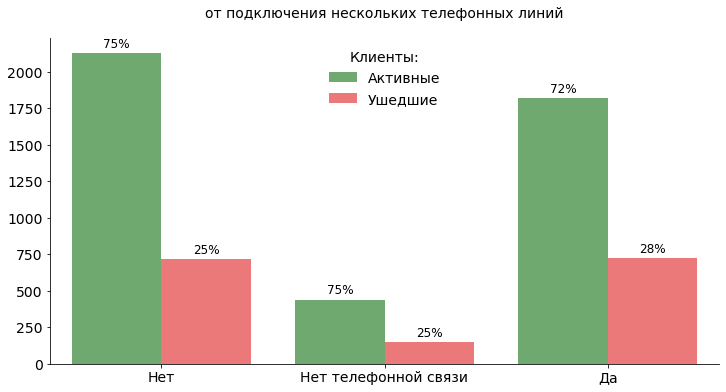

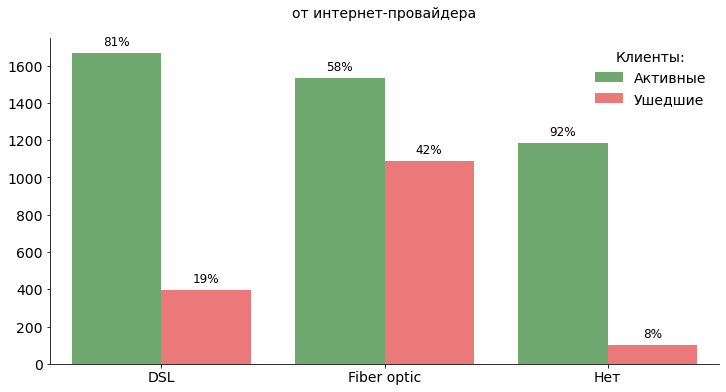

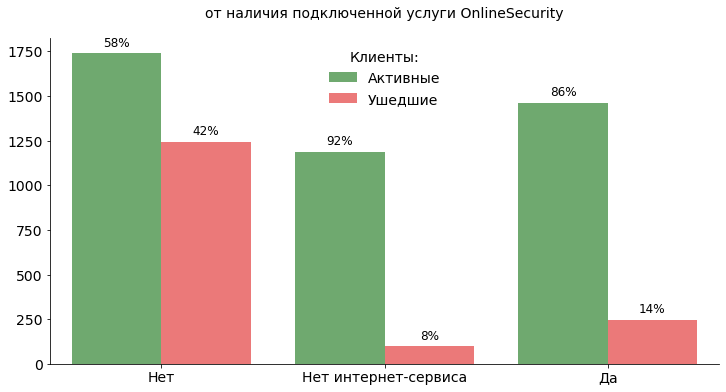

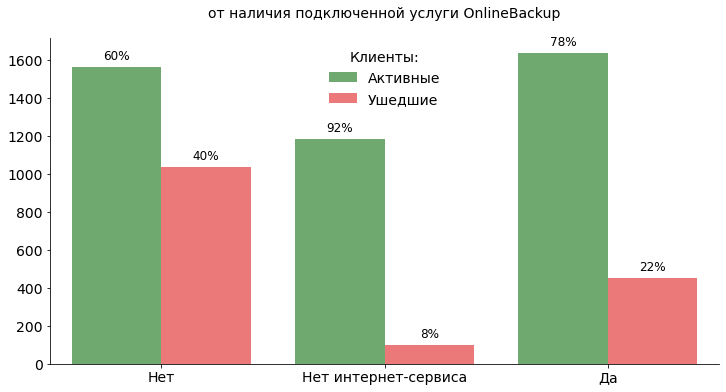

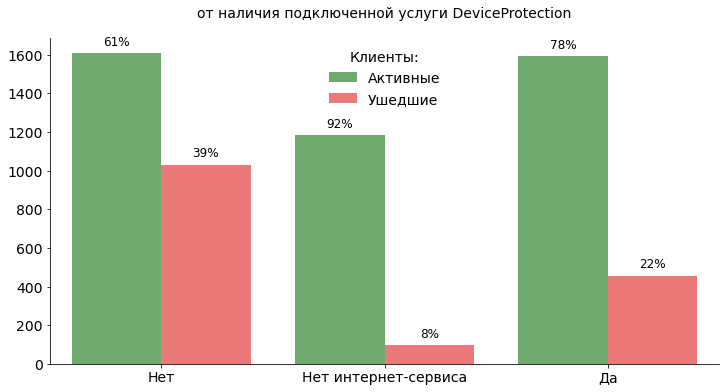

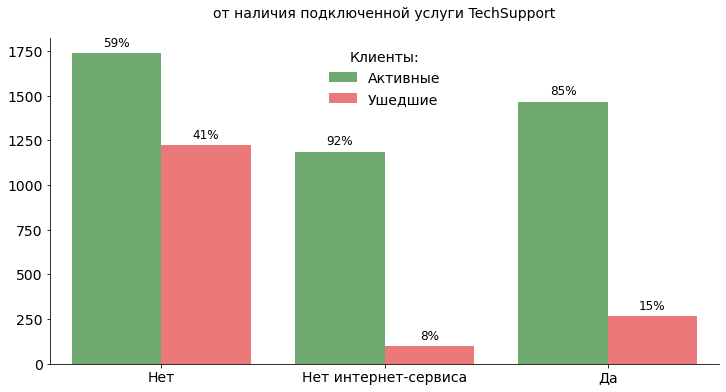

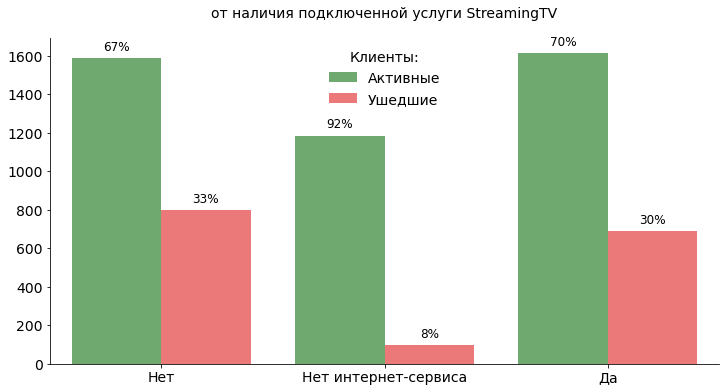

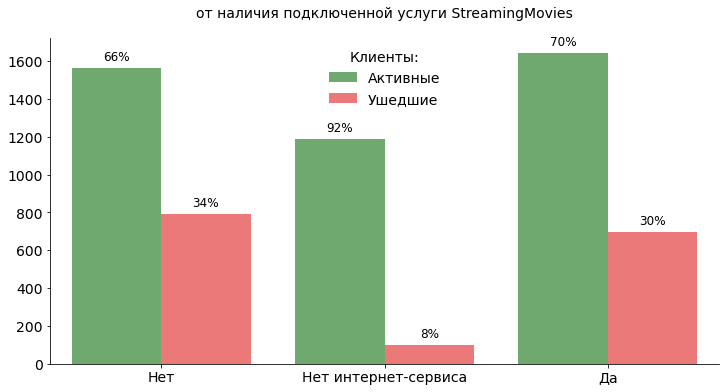

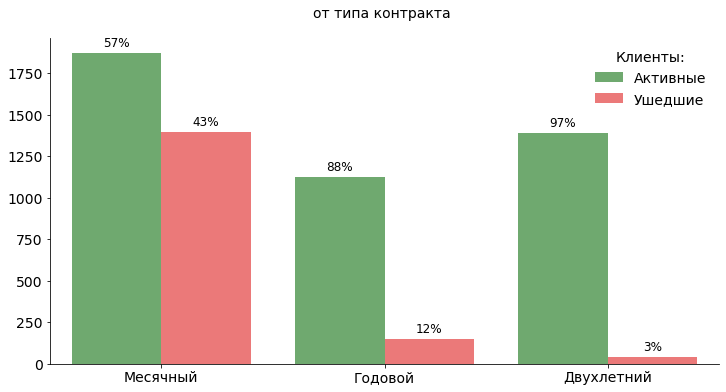

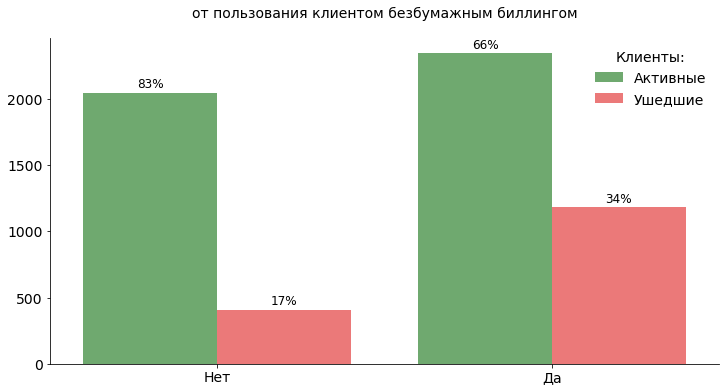

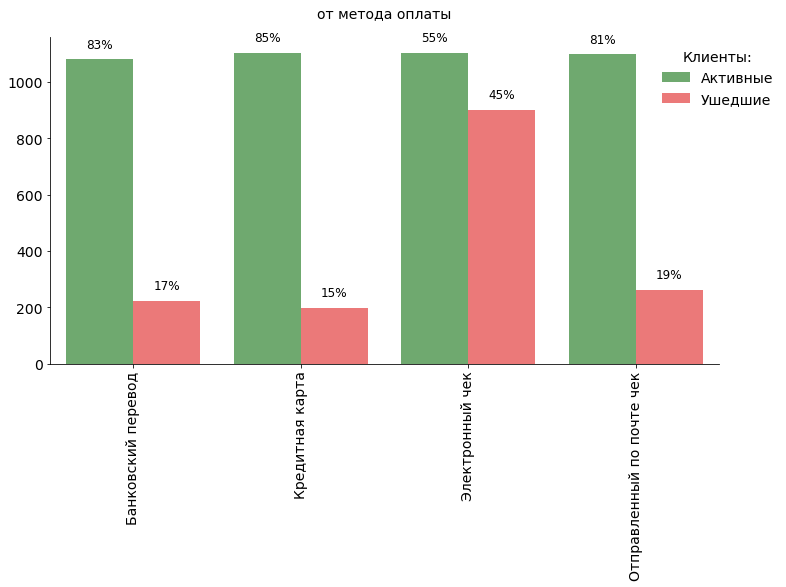

In [15]:
# построим графики зависимости для категориальных данных
for i in range(1, 18):
    #  пропускаем колонку  'tenure'  
    if data.columns[i] == 'tenure':
        continue
    else:
        # формируем датасет для каждого признака        
        df = data.groupby(['Churn', data.columns[i]])['customerID'].count().reset_index(name='count').copy()
        
        # для лучшего восприятия для легенды меняем 'No' и 'Yes' на 'Активные' и 'Ушедшие'       
        df['Churn'] = df['Churn'].apply(lambda x: 'Активные' if x == 'No' else 'Ушедшие')
        
        # задаем размер графиков       
        fig, ax = plt.subplots(figsize = (12,6))
 
        # задаем цвет для столбцов графика         
        colors = ['#008000', '#ff0000']
        sns.set_palette(colors)
        
        # рисуем график       
        sns.barplot(data=df, x=df.columns[1], y=df.columns[2], hue=df.columns[0], alpha = 0.6)
        
        # увеличиваем размер меток оси y        
        plt.yticks(fontsize=14)
        
        # убираем название осей       
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        if i == 17:
            # редактируем последний график            
            ax.legend(bbox_to_anchor=(1.1, 1), title='Клиенты:', title_fontsize=14, fontsize=14).get_frame().set_linewidth(0.0)
            ax.set_title('от метода оплаты', fontsize=14, pad=20)
            labels = ['Банковский перевод', 'Кредитная карта', 'Электронный чек', 'Отправленный по почте чек']
            plt.xticks(rotation=90, fontsize=14)
        else:
            # редактируем легенду и метки осей остальных графиков          
            ax.legend(title='Клиенты:', title_fontsize=14, fontsize=14).get_frame().set_linewidth(0.0)
            plt.xticks(rotation=0, fontsize=14)
            
            #  для каждого признака указываем соответствующий заголовок и метки оси
            if i == 1:
                ax.set_title('Отток клиентов в зависимости:\n от пола', fontsize=14, pad=20)
                labels = ['Женщина', 'Мужчина']
            elif i == 2:
                ax.set_title(' от нахождении клиента на пенсии', fontsize=14, pad=20)
                labels = ['Не пенсионеры', 'Пенсионеры']
            elif i == 3:
                ax.set_title('от семейного положения', fontsize=14, pad=20)
                labels = ['Холост/Незамужем', 'Женат/замужем']
            elif i == 4:
                ax.set_title('от наличия детей', fontsize=14, pad=20)
                labels = ['Нет', 'Да']
            elif i == 6:
                ax.set_title('от подключения телефонной связи', fontsize=14, pad=20)
                labels = ['Нет', 'Да']
            elif i == 7:
                ax.set_title('от подключения нескольких телефонных линий', fontsize=14, pad=20)
                labels = ['Нет', 'Нет телефонной связи', 'Да']
            elif i == 8:
                ax.set_title('от интернет-провайдера', fontsize=14, pad=20)
                labels = ['DSL', 'Fiber optic', 'Нет']
            elif i == 15:
                ax.set_title('от типа контракта ', fontsize=14, pad=20)
                labels = ['Месячный', 'Годовой', 'Двухлетний']
            elif i == 16:
                ax.set_title('от пользования клиентом безбумажным биллингом', fontsize=14, pad=20)
                labels = ['Нет', 'Да']
            else:
                ax.set_title(f'от наличия подключенной услуги {data.columns[i]}', fontsize=14, pad=20)
                labels = ['Нет', 'Нет интернет-сервиса', 'Да']
            
        # изменяем метки оси x       
        ax.set_xticklabels(labels) 
           
        # над каждым баром указываем проценты        
        bars = ax.patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]
        
        for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r

            ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha='center', fontsize=12)
            ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha='center', fontsize=12)
        
        #  убираем верхнюю и правую рамки      
        sns.despine()
plt.show()

Проанализировав графики можно сделать вывод, что большая часть ушедших, клиенты:
1. пенсионеры;
2. не замежем/ не женаты;
3. без детей;
4. у которых интернет-провайдер Fiber optic;
5. не подключивших услуги: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport;
6. заключившие договор Month-to-month (особенно в первые месяцы);
7. пользующиеся безбумажным биллингом;
8. с методом оплаты Electronic check.

In [16]:
# основываясь на полученной информации формируем новый датасет
main = data.drop(columns=(['customerID', 'gender', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'TotalCharges'])).copy()
main.head(5)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,Yes,72,No,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,No
1,0,No,No,44,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,No
2,1,Yes,No,38,Fiber optic,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,Yes
3,0,No,No,4,DSL,No,No,No,No,Month-to-month,Yes,Electronic check,55.90,No
4,0,No,No,2,DSL,Yes,No,Yes,No,Month-to-month,No,Electronic check,53.45,No


In [17]:
# переводим бинарные данные в числовой формат
from sklearn.preprocessing import LabelEncoder

# выделяем столбцы с категориальными данными
columns_list = main.columns.drop(['tenure', 'MonthlyCharges']).to_list()

# классом LabelEncoder кодируем целевые метки в каждом столбце
for column in columns_list:
    main[column] = LabelEncoder().fit_transform(main[column])
    
main.head(5)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,1,72,2,1,1,1,1,2,0,1,24.10,0
1,0,0,0,44,1,0,2,2,0,0,1,1,88.15,0
2,1,1,0,38,1,0,0,0,0,0,1,0,74.95,1
3,0,0,0,4,0,0,0,0,0,0,1,2,55.90,0
4,0,0,0,2,0,2,0,2,0,0,0,2,53.45,0


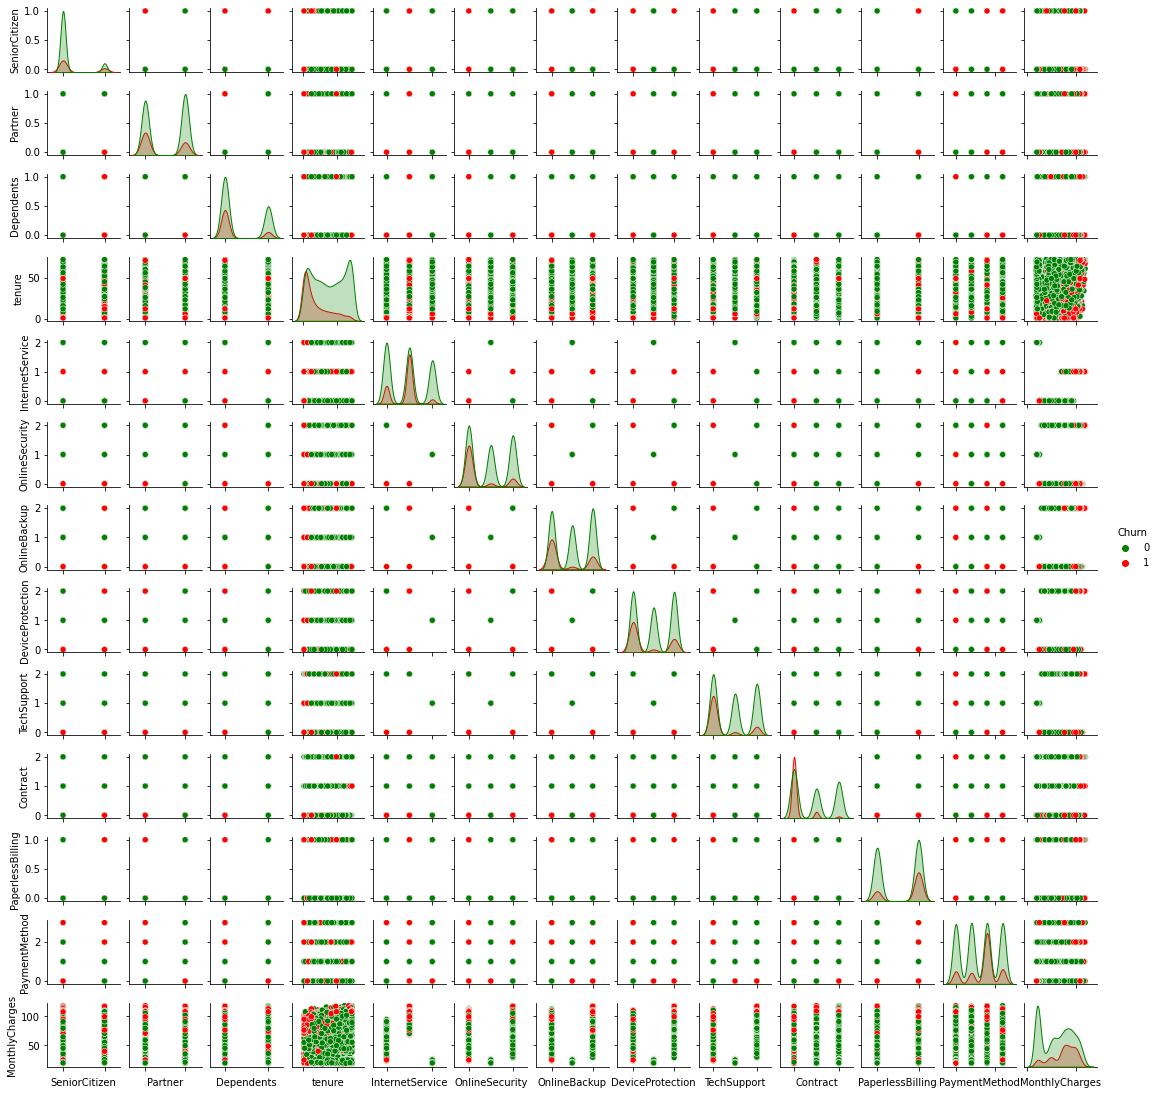

In [18]:
# визуализируем итоговый датасет с помощью pairplot
g = sns.pairplot(main, hue='Churn', palette = colors, size=1.2)

g.set(xticklabels=[])

plt.show()

# 3. Построение моделей для прогнозирования оттока

Т.к. в датасете преимущественно бинарные данные, самих данных не очень много и перед нами стоит задача классификации клиентов, были выбраны следующие модели: LogisticRegression, RandomForestClassifier, GaussianNB, SVC.

In [19]:
# загрузка библиотек
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [20]:
# разделяем данные на тренировочный и тестовый датасеты
dat = main.drop(columns='Churn')
target = main.Churn

train_dat, test_dat, train_target, test_target = train_test_split(dat, target, test_size=0.3, random_state=42)

In [21]:
# функция делает предсказания по каждой модели. Выводит значение roc aus score на экран. Возвращает словарь с предсказаниями по всем моделям
def model_prediction(models, data_train, data_test, targets_train, targets_test, models_name):
    pred_models = dict()
    
    for index, model in enumerate(models):
        model.fit(data_train, targets_train)
        pred = model.predict(data_test)
        pred_models[models_name[index]] = pred
        
        print(f'{models_name[index]}:\nroc aus score: {roc_auc_score(targets_test, pred)}\n')

    return pred_models
        
lr = LogisticRegression(random_state=42)
rfc = RandomForestClassifier(random_state=42)
gnb = GaussianNB()
svc = SVC(random_state=42)

models = [lr, rfc, gnb, svc]
models_name = ['LogisticRegression', 'RandomForestClassifier', 'GaussianNB', 'SVC']

models_pred = model_prediction(models, train_dat, test_dat, train_target, test_target, models_name)

LogisticRegression:
roc aus score: 0.7149445399607385

RandomForestClassifier:
roc aus score: 0.6771850421483467

GaussianNB:
roc aus score: 0.7456311987580031

SVC:
roc aus score: 0.6519232989902359



Модели GaussianNB и LogisticRegression показали себя лучше всех.

# 4. Сравнение качества моделей 

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
# функция для каждой модели выводит на экран confusion_matrix и classification report
def metrics(models_pred, test_target, models_name):
    keys = list(models_pred.keys())
    for index in range(len(models_pred)):
         
        if keys[index] in models_name:
            print('{0}:\nconfusion_matrix:\n{1}\n\nclassification report\n{2}\n'.format(keys[index],
                                                                                        confusion_matrix(test_target, models_pred[keys[index]]),
                                                                                        classification_report(test_target, models_pred[keys[index]])))

models_name = ['GaussianNB', 'LogisticRegression']
metrics(models_pred, test_target, models_name)

LogisticRegression:
confusion_matrix:
[[1192  129]
 [ 223  249]]

classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1321
           1       0.66      0.53      0.59       472

    accuracy                           0.80      1793
   macro avg       0.75      0.71      0.73      1793
weighted avg       0.79      0.80      0.80      1793


GaussianNB:
confusion_matrix:
[[996 325]
 [124 348]]

classification report
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1321
           1       0.52      0.74      0.61       472

    accuracy                           0.75      1793
   macro avg       0.70      0.75      0.71      1793
weighted avg       0.79      0.75      0.76      1793




### Вывод:


Качество модели GaussianNB по roc_aus_score выше модели LogisticRegression, по recall она одинаково хорошо будет определять оба класса, но LogisticRegression лучше определяет оставшихся клиентов. Что неудивительно, ведь перекос в сторону оставшихся клиентов достаточно большой (данные не сбалонсированы). Так же количество FP  модели GaussianNB намного больше LogisticRegression. 